In [3]:
# pip install pygam


In [6]:
import pandas as pd
from pygam import LinearGAM, s, l
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

pitch = pd.read_excel("reduced_pitch.xlsx")

numeric_vars = ['Transfer_value', 'Exp_contr', 'Age', 'Minutes_pl', 'Minutes_pl_BC', 'NP_goals', 'Pen_goals', 'Pen_goals_BC', 'Assists', 'Interceptions', 'GCA_BC', 'Yellow_cards', 'Red_cards']
pitch[numeric_vars] = StandardScaler().fit_transform(pitch[numeric_vars])

In [4]:
ind_vars = ['Exp_contr', 'Age', 'Minutes_pl', 'Minutes_pl_BC',
       'NP_goals', 'Pen_goals', 'Pen_goals_BC', 'Assists', 'Interceptions',
       'GCA_BC', 'Yellow_cards', 'Red_cards', 'Reduced_team_from_Inter',
       'Reduced_team_from_AC Milan', 'Reduced_team_from_Juventus',
       'Reduced_team_from_Napoli', 'Reduced_team_from_Paris SG',
       'Reduced_team_from_Real Madrid', 'Reduced_team_from_Barcelona',
       'Reduced_team_from_Atlético Madrid', 'Reduced_team_from_Bayern Munich',
       'Reduced_team_from_Bor. Dortmund', 'Reduced_team_from_Chelsea',
       'Reduced_team_from_Arsenal', 'Reduced_team_from_Man City',
       'Reduced_team_from_Man Utd', 'Reduced_team_from_Liverpool', 'Reduced_country_from_Inglaterra',
       'Reduced_country_from_Francia', 'Reduced_country_from_España',
       'Reduced_country_from_Italia', 'Reduced_country_from_Alemania',
       'Reduced_country_from_Portugal', 'Reduced_country_from_Países Bajos',
       'Reduced_country_from_Argentina', 'Reduced_country_from_Brasil', 'Position_Centre-Forward',
       'Position_Left-Back', 'Position_Central Midfield',
       'Position_Centre-Back', 'Position_Right Winger',
       'Position_Attacking Midfield', 'Position_Defensive Midfield',
       'Position_Left Winger', 'Position_Second Striker',
       'Position_Left Midfield', 'Position_Right Midfield']

In [5]:
# X = pitch[ind_vars].values  # Variables independientes
# y = pitch['Transfer_value'].values  # Variable dependiente

# # Crear y ajustar el modelo GAM
# gam = LinearGAM(s(0) + s(1) + s(2) + s(3)).fit(X, y)

# # Hacer predicciones
# y_pred = gam.predict(X)

# # Calcular R^2
# r2 = gam.score(X, y)
# print(f"R^2: {r2:.4f}")

R^2: 0.4108


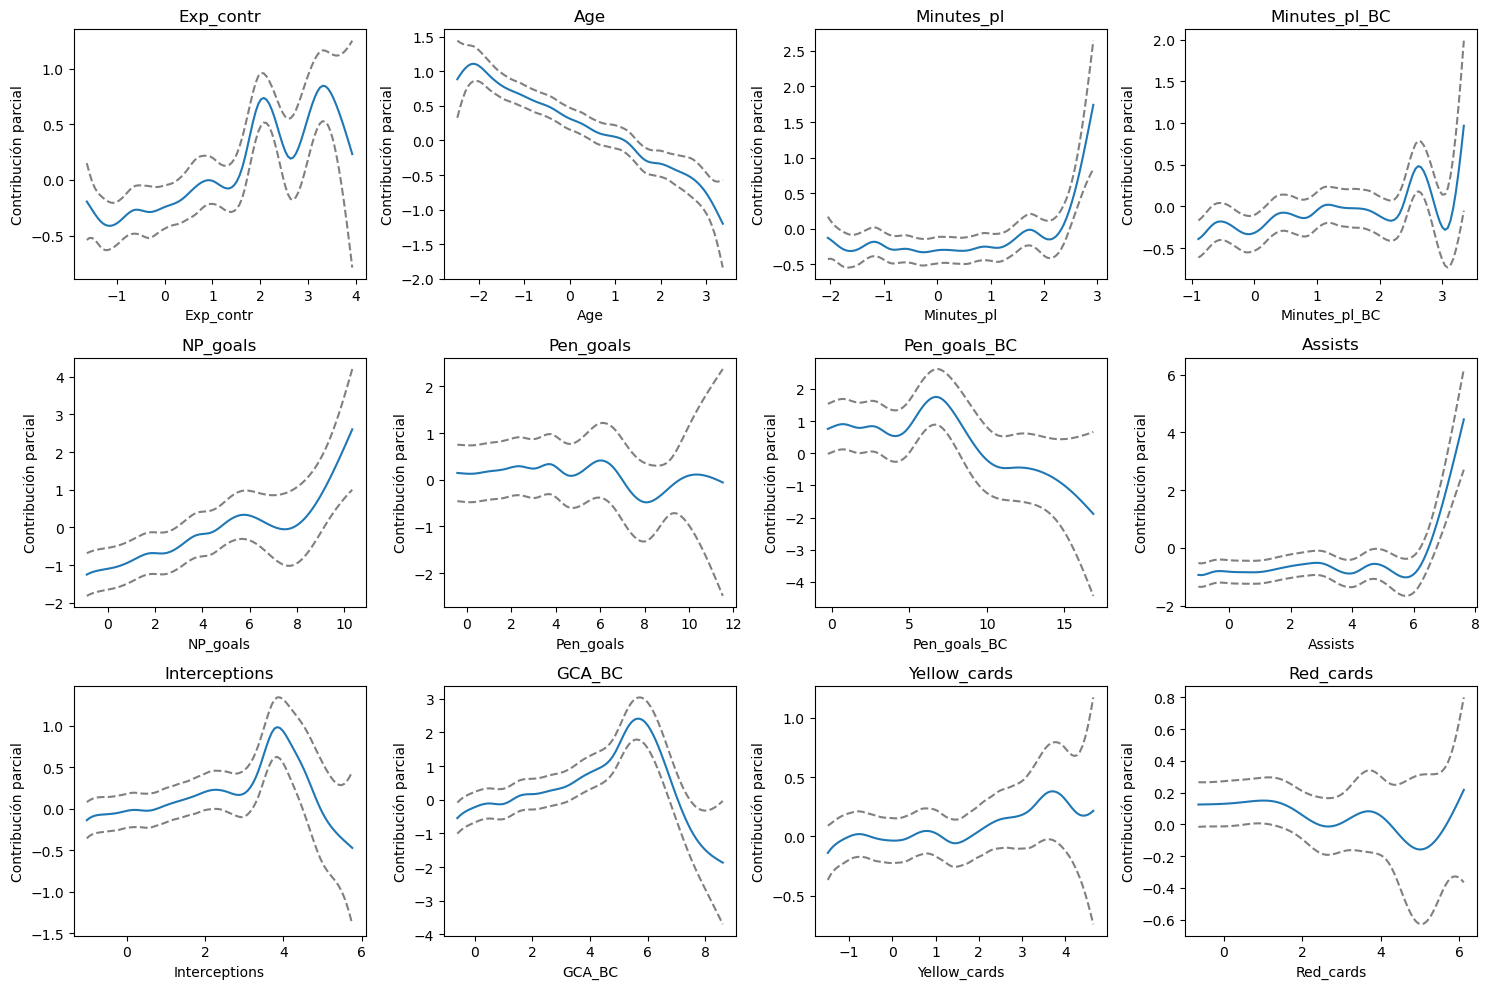

In [31]:
import matplotlib.pyplot as plt
from pygam.terms import SplineTerm
import numpy as np

n_vars_to_plot = 12  # Número de variables que quieres plotear

plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura según necesites

for i in range(n_vars_to_plot):
    term = gam.terms[i]
    if isinstance(term, SplineTerm):
        XX = gam.generate_X_grid(term=i)
        pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
        plt.subplot(3, 4, i + 1)  # 3 filas, 4 columnas de subplots
        plt.plot(XX[:, term.feature], pdep)
        plt.plot(XX[:, term.feature], confi[:, 0], c='gray', ls='--')
        plt.plot(XX[:, term.feature], confi[:, 1], c='gray', ls='--')
        plt.title(f'{titles[i]}')
        plt.xlabel(titles[i])
        plt.ylabel('Contribución parcial')

plt.tight_layout()
plt.show()

In [8]:
from pygam import LinearGAM, s, l
import numpy as np

X = pitch[ind_vars].values
y = pitch['Transfer_value'].values

n_vars = X.shape[1]
terms_list = []

for i in range(n_vars):
    if i < 12:
        terms_list.append(s(i))
    else:
        terms_list.append(l(i))

# Unir los términos con el operador '+' usando sum
formula = sum(terms_list[1:], terms_list[0])

gam = LinearGAM(formula).fit(X, y)
r2 = gam.score(X, y)
print(f"R^2: {r2:.4f}")

y_pred = gam.predict(X)
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

R^2: 0.5639
MSE: 0.4360607753232746


In [17]:
p_values = gam.statistics_['p_values']

# Inicializar lista para guardar resultados
impacts = []

# Iterar sobre variables
for i in range(len(ind_vars)):
    if p_values[i] < 0.05:  # Filtrar por significancia estadística
        XX = gam.generate_X_grid(term=i)
        partial = gam.partial_dependence(term=i, X=XX)
        variance = np.var(partial)
        impacts.append((ind_vars[i], variance))

# Crear DataFrame ordenado por varianza descendente
impact_df = pd.DataFrame(impacts, columns=['Variable', 'Partial_Effect_Variance'])
impact_df = impact_df.sort_values('Partial_Effect_Variance', ascending=False)

print(impact_df)

                             Variable  Partial_Effect_Variance
7                             Assists                 1.266831
9                              GCA_BC                 1.118040
6                        Pen_goals_BC                 0.887825
4                            NP_goals                 0.727323
1                                 Age                 0.350193
0                           Exp_contr                 0.155947
2                          Minutes_pl                 0.154817
8                       Interceptions                 0.110444
5                           Pen_goals                 0.053363
3                       Minutes_pl_BC                 0.052368
15    Reduced_team_from_Bayern Munich                 0.030457
14  Reduced_team_from_Atlético Madrid                 0.028391
12         Reduced_team_from_Paris SG                 0.027068
11           Reduced_team_from_Napoli                 0.020888
10         Reduced_team_from_Juventus                 0